In [425]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
plt.style.use('seaborn-pastel')

import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

pd.options.display.max_rows=100
pd.options.display.max_columns=100
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [426]:
df = pd.read_csv('../2nd/data.csv')
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 예측 모델링에 사용할 변수 선택 및 전처리

## 분포가 극단적으로 매우 불균형한 컬럼 제외

In [427]:
df_1 = df.copy()
df_1.drop(columns=['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Functional', 'GarageCond', 'GarageQual', 'MiscFeature'],
         inplace=True)
print(df_1.shape)
df_1.head(3)

(1460, 71)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,NaN,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,NaN,Attchd,2003.0,RFn,2,548,Y,0,61,0,0,0,0,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,NaN,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976.0,RFn,2,460,Y,298,0,0,0,0,0,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,NaN,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,Y,0,42,0,0,0,0,NaN,NaN,0,9,2008,WD,Normal,223500


## 전처리

### 수치형 컬럼 결측치 처리

In [428]:
# 결측치 200개 이상인 컬럼은 삭제
df_null = pd.DataFrame(df_1.isnull().sum())
df_null_index = df_null.loc[df_null[0] > 200].index
df_1.drop(columns=df_null_index.tolist(), inplace=True)
df_1.shape

(1460, 66)

In [429]:
# 결측치를 지닌 나머지 컬럼들은 다른 값으로 채워넣음
df_1_null = df_1.isnull().sum().loc[df_1.isnull().sum()>0].index.tolist()
df_1_null

['MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish']

In [430]:
# 수치형 컬럼은 평균값으로 대체
df_1.fillna(df_1.mean(), inplace=True)
# 필요없는 ID 컬럼 삭제
df_1.drop(columns='Id', inplace=True)

In [431]:
df_1.shape

(1460, 65)

### 범주형 변수 전처리(원-핫 인코딩)

In [432]:
# 다시 결측치로 돌아와서 결측치가 있는 범주형 컬럼을 원-핫 인코딩으로 처리
df_1.isnull().sum()[df_1.isnull().sum() > 0]

MasVnrType       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageFinish    81
dtype: int64

In [433]:
df_1_ohe = pd.get_dummies(df_1)
df_1_ohe.shape

(1460, 225)

원핫인코딩을 하면 범주형 변수의 결측치 값은 None이란 컬럼으로 대체되므로 따로 결측치를 처리하지 않아도 된다.  
원핫인코딩 이후 225개의 컬럼으로 늘어났다.

In [434]:
df_1_ohe.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,...,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,0,1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,0,1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,0,1,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,0,1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


### 종속변수 'SalePrice' 전처리

데이터의 종속변수인 SalePrice는 정규분포일까?  
종속변수가 정규분포에서 크게 벗어난 왜도의 형태를 띤다면 예측 성능이 크게 저하될 수 있다.  
따라서, Target값이 정규분포를 이루는지 확인하고 많이 왜곡돼있다면 가장 일반적인 방법인 로그 스케일링으로 왜곡 정도를 완화시켜주면 좋다.  

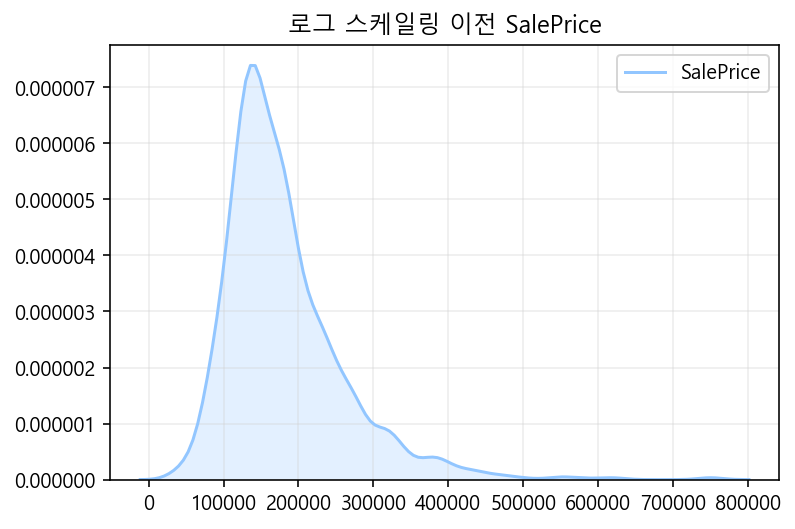

In [435]:
sns.kdeplot(df_1_ohe['SalePrice'], shade=True)
plt.title('로그 스케일링 이전 SalePrice')
plt.grid(color='lightgrey', alpha=0.4)

right skewed distribution이므로 로그 스케일링한다.  
**(로그 스케일링한 종속변수로 학습을 하고 예측한 값은 다시 expml()로 원상복구하면 됨)**

Text(0.5, 1.0, '로그 스케일링 이후 SalePrice')

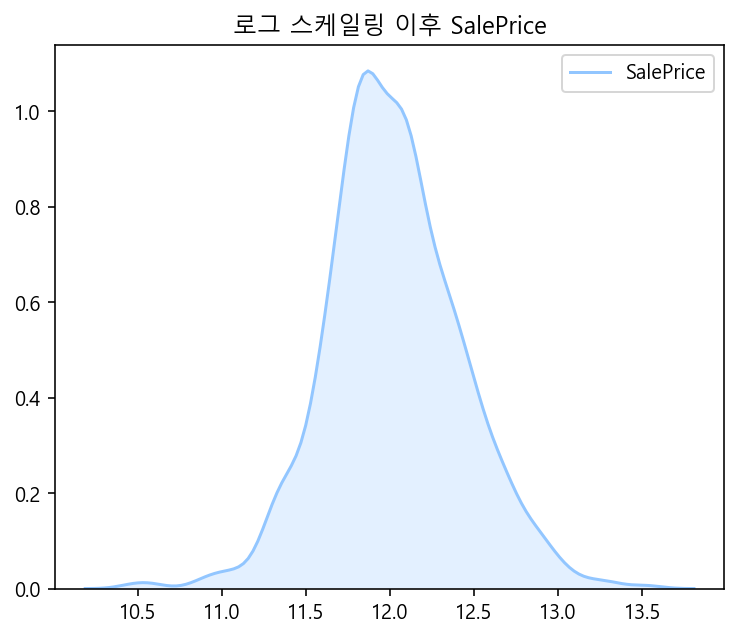

In [436]:
plt.figure(figsize=(6, 5))
sns.kdeplot(np.log1p(df_1_ohe['SalePrice']), shade=True)
plt.title('로그 스케일링 이후 SalePrice')
# plt.grid(color='lightgrey', alpha=0.05)

In [437]:
# 로그 스케일링
ori_saleprice = df_1_ohe['SalePrice']
df_1_ohe['SalePrice'] = np.log1p(df_1_ohe['SalePrice'])
print('스케일링 이전 SalePrice의 평균 :', ori_saleprice.mean())
print('스케일링 이전 SalePrice의 분산 :', ori_saleprice.var())
print('스케일링 이후 SalePrice의 평균 :', df_1_ohe['SalePrice'].mean())
print('스케일링 이후 SalePrice의 분산 :', df_1_ohe['SalePrice'].var())

스케일링 이전 SalePrice의 평균 : 180921.19589041095
스케일링 이전 SalePrice의 분산 : 6311111264.297451
스케일링 이후 SalePrice의 평균 : 12.024057394918371
스케일링 이후 SalePrice의 분산 : 0.15955972195787874


In [438]:
# 모델 학습에 사용할 최종 데이터셋
df_1_ohe.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,...,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,12.247699,0,0,0,1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,12.109016,0,0,0,1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,12.317171,0,0,0,1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,11.849405,0,0,0,1,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,12.429220,0,0,0,1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


# 모델 학습/예측

## 기본적인 선형 회귀 모델들인 LinearRegression, Ridge, Lasso로 학습

In [439]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [440]:
# 데이터 분할
X = df_1_ohe.drop('SalePrice', axis=1)
y = df_1_ohe['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# 세 선형회귀 모델 학습
lr = LinearRegression()
lr.fit(X_train, y_train)
ridge = Ridge()
ridge.fit(X_train, y_train)
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [441]:
# rmse(root mean squared error)를 측정하는 함수 생성
def rmse_function(model):
    pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    return rmse

# 여러 개의 모델의 rmse 계산
def rmse_functions(models):
    rmses=[]
    for model in models:
        rmse = rmse_function(model)
        rmses.append(rmse)
    return rmses

# linear regression, ridge, lasso로 학습한 모델의 rmse 계산

rmse_functions([lr, ridge, lasso])

[0.13947594376165356, 0.13201959450111478, 0.1518161184683712]

**rmse는 ridge, linear regressoin, lasso 모델 순으로 커진다.**  
**즉, lasso의 성능이 제일 안 좋게 나온다.**

### cross_val_score()로 다시 확인

In [442]:
# train_test_split()을 통한 데이터 분할에 문제가 있을 수 있으므로 교차 검증으로 재확인

from sklearn.model_selection import cross_val_score
def rmse_means(models):
    for model in models:
        rmse_li = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5))
        rmse_mean = np.mean(rmse_li)
        print('{} 교차 검증 평균 RMSE : {}'.format(model.__class__.__name__, np.round(rmse_mean, 5)))
        
rmse_means([lr, ridge, lasso])

LinearRegression 교차 검증 평균 RMSE : 0.14987
Ridge 교차 검증 평균 RMSE : 0.14502
Lasso 교차 검증 평균 RMSE : 0.19766


**교차 검증 결과 평균 rmse는 이전과 마찬가지로 ridge, linear regression, lasso 모델 순으로 커진다.**

### Ridge와 Lasso의 하이퍼 파라미터 조정

Ridge와 Lasso의 규제의 강도인 alpha값의 최적값을 찾으면 rmse를 낮출 수 있지 않을까?

In [443]:
from sklearn.model_selection import GridSearchCV

ridge_grid_model = GridSearchCV(ridge, param_grid={'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]},
                               scoring='neg_mean_squared_error', cv=5)
ridge_grid_model.fit(X, y)
ridge_grid_rmse = np.sqrt(-1 * ridge_grid_model.best_score_)

lasso_grid_model = GridSearchCV(lasso, param_grid={'alpha':[0.001, 0.005, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]},
                                scoring='neg_mean_squared_error', cv=5)
lasso_grid_model.fit(X, y)
lasso_grid_rmse = np.sqrt(-1 * lasso_grid_model.best_score_)

print('{} 최적의 alpha값 : {}, 최적의 평균 rmse값: {}'.format(ridge.__class__.__name__, ridge_grid_model.best_params_, np.round(ridge_grid_rmse, 5)))
print('{} 최적의 alpha값 : {}, 최적의 평균 rmse값: {}'.format(lasso.__class__.__name__, lasso_grid_model.best_params_, np.round(lasso_grid_rmse, 5)))

Ridge 최적의 alpha값 : {'alpha': 15}, 최적의 평균 rmse값: 0.14171
Lasso 최적의 alpha값 : {'alpha': 0.001}, 최적의 평균 rmse값: 0.14122


train_test_split과 교차 검증 때의 rmse값보다 더 낮게 나온 것을 확인할 수 있다.  
또한, Lasso가 Ridge보다 rmse가 더 낮게 나왔다.

### 조정된 알파값으로 학습

In [444]:
lr = LinearRegression()
ridge = Ridge(alpha=15)
lasso = Lasso(alpha=0.001)
lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# rmse
print(rmse_functions([lr, ridge, lasso]))

[0.13947594376165356, 0.11491938762612383, 0.1138726161638724]


최초의 rmse보다 ridge, lasso의 rmse가 굉장히 많이 낮아졌다. 성능이 향상됐다.

**성능이 높게 나온 ridge와 lasso의 회귀계수를 시각화한다**

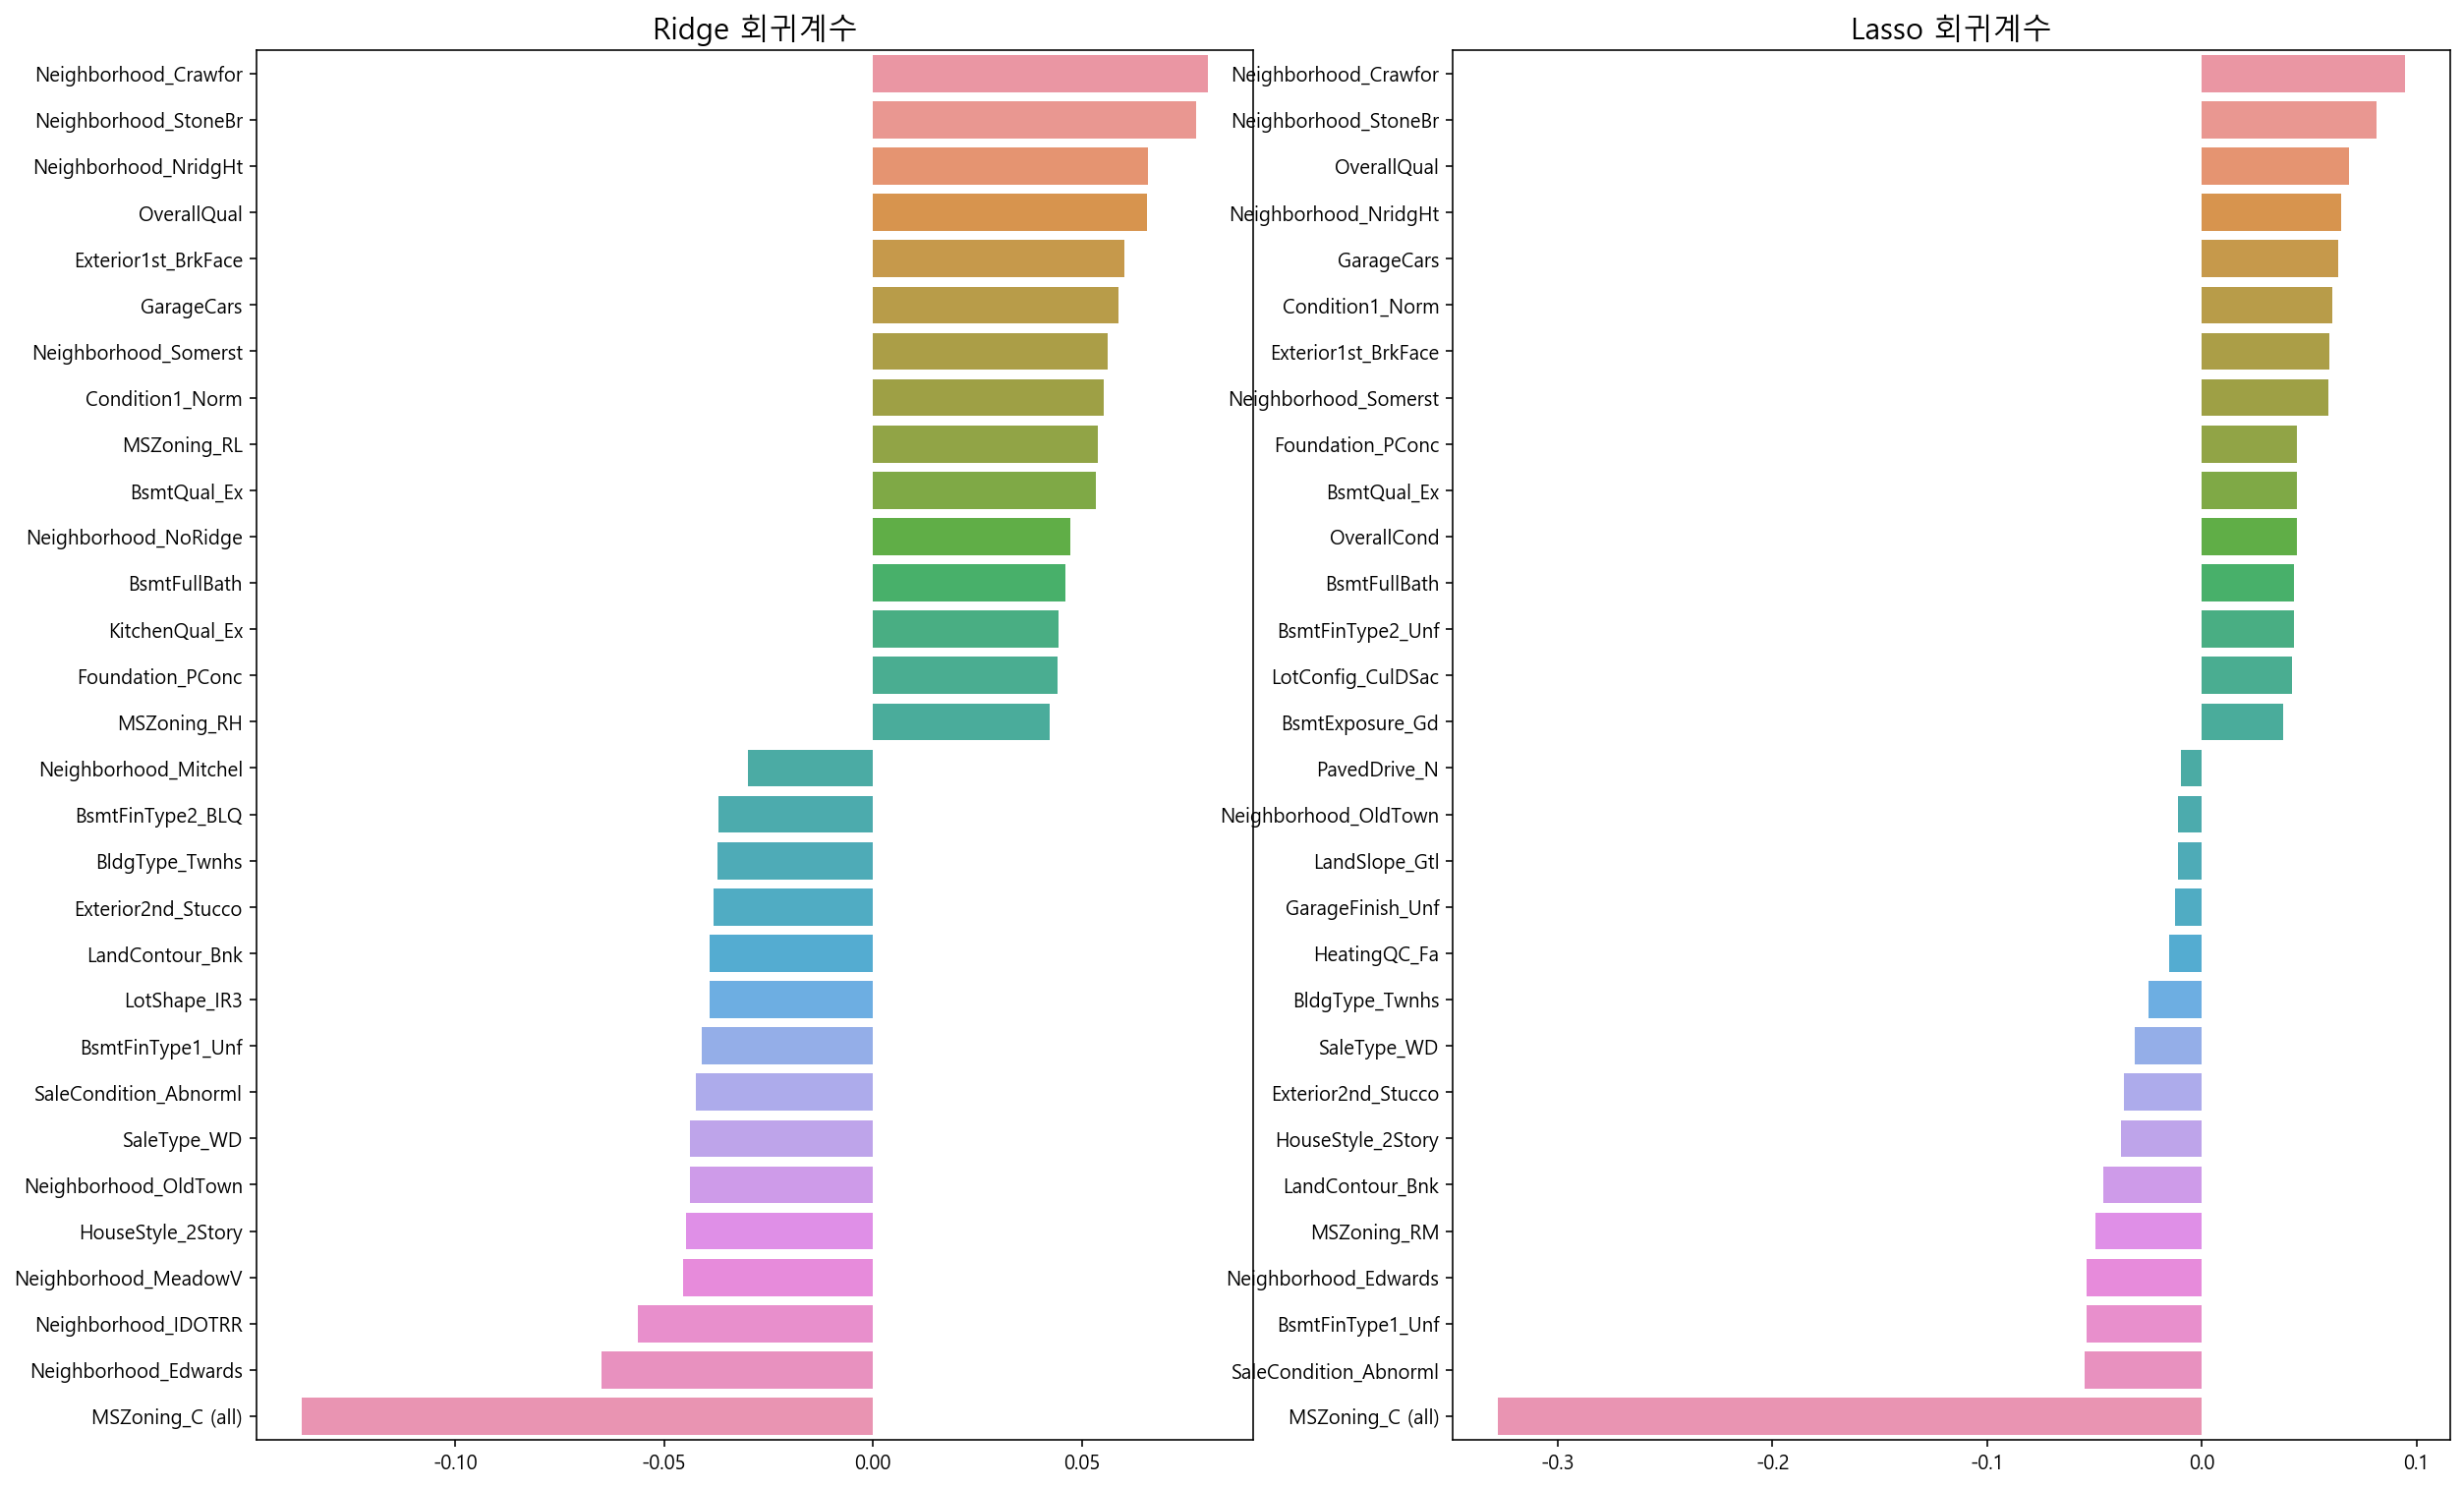

In [445]:
# 회귀계수 값의 상위 15개, 하위 15개 구하는 감수
def coefficient_15(model, n=15):
    # 시리즈 형태로 만듬
    coef = pd.Series(model.coef_, index=X.columns)
    top_coef = coef.sort_values(ascending=False).head(n)
    bottom_coef = coef.sort_values(ascending=False).tail(n)
    return top_coef, bottom_coef
    
# 회귀계수 시각화
def coefficient_visualize(models):
    f, ax = plt.subplots(1, 2, figsize=(20, 13))
    for i, model in enumerate(models):
        # 상위, 하위 15개의 회귀 계수
        top_coef, bottom_coef = coefficient_15(model)
        # 시각화
        ax[i].set_title(model.__class__.__name__+ ' 회귀계수', size=15)
        sns.barplot(y=pd.concat([top_coef, bottom_coef]).index, x=pd.concat([top_coef, bottom_coef]).values, ax=ax[i])
        
models = [ridge, lasso]
coefficient_visualize(models)

## Ridge, Lasso 모델 성능 높이기

### 분포의 왜곡이 심한 컬럼 로그 스케일링

In [446]:
from scipy.stats import skew
# stats의 skew 함수로 왜곡 정도를 파악한 후, 1보다 큰 컬럼들은 로그 스케일링
# 원핫인코딩으로 더미변수화한 컬럼들은 포함하면 안됨
# 숫자형 컬럼만 따로 변수에 저장
non_object_index = df_1.dtypes[df_1.dtypes != 'object'].index
skew_col = df_1[non_object_index].apply(lambda x: skew(x))
# 왜곡의 정도가 1보다 큰 컬럼
skew_col_exceed_1 = skew_col[skew_col > 1]
skew_col_exceed_1.sort_values(ascending=False)

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
OpenPorchSF       2.361912
SalePrice         1.880941
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64

In [447]:
# 로그 스케일링한 컬럼들 데이터에 반영
df_1[skew_col_exceed_1.index] = np.log1p(df_1[skew_col_exceed_1.index])

### 다시 원핫인코딩하고 모델 재학습

In [448]:
# 다시 원핫인코딩
df_1_ohe = pd.get_dummies(df_1)

# 다시 재학습
X = df_1_ohe.drop(columns='SalePrice', axis=1) 
y = df_1_ohe['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [449]:
ridge = Ridge()
ridge.fit(X_train, y_train)
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [450]:
# 최적의 알파값
ridge_grid_model = GridSearchCV(ridge, param_grid={'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]},
                               scoring='neg_mean_squared_error', cv=5)
ridge_grid_model.fit(X, y)
ridge_grid_rmse = np.sqrt(-1 * ridge_grid_model.best_score_)

lasso_grid_model = GridSearchCV(lasso, param_grid={'alpha':[0.001, 0.005, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]},
                                scoring='neg_mean_squared_error', cv=5)
lasso_grid_model.fit(X, y)
lasso_grid_rmse = np.sqrt(-1 * lasso_grid_model.best_score_)

print('{} 최적의 alpha값 : {}, 최적의 평균 rmse값: {}'.format(ridge.__class__.__name__, ridge_grid_model.best_params_, np.round(ridge_grid_rmse, 5)))
print('{} 최적의 alpha값 : {}, 최적의 평균 rmse값: {}'.format(lasso.__class__.__name__, lasso_grid_model.best_params_, np.round(lasso_grid_rmse, 5)))

Ridge 최적의 alpha값 : {'alpha': 12}, 최적의 평균 rmse값: 0.12917
Lasso 최적의 alpha값 : {'alpha': 0.001}, 최적의 평균 rmse값: 0.1268


**특정 컬럼들을 로그 스케일링하고 모델을 다시 학습시켰더니, ridge와 lasso 둘 다 rmse가 전보다 낮아졌다. ridge의 경우 최적 alpha값도 바뀌었다.**

In [451]:
# 조정된 알파값으로 학습
lr = LinearRegression()
ridge = Ridge(alpha=12)
lasso = Lasso(alpha=0.001)
lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# rmse
print(rmse_functions([lr, ridge, lasso]))

[0.12997080043156667, 0.11079971460101788, 0.10800848393224706]


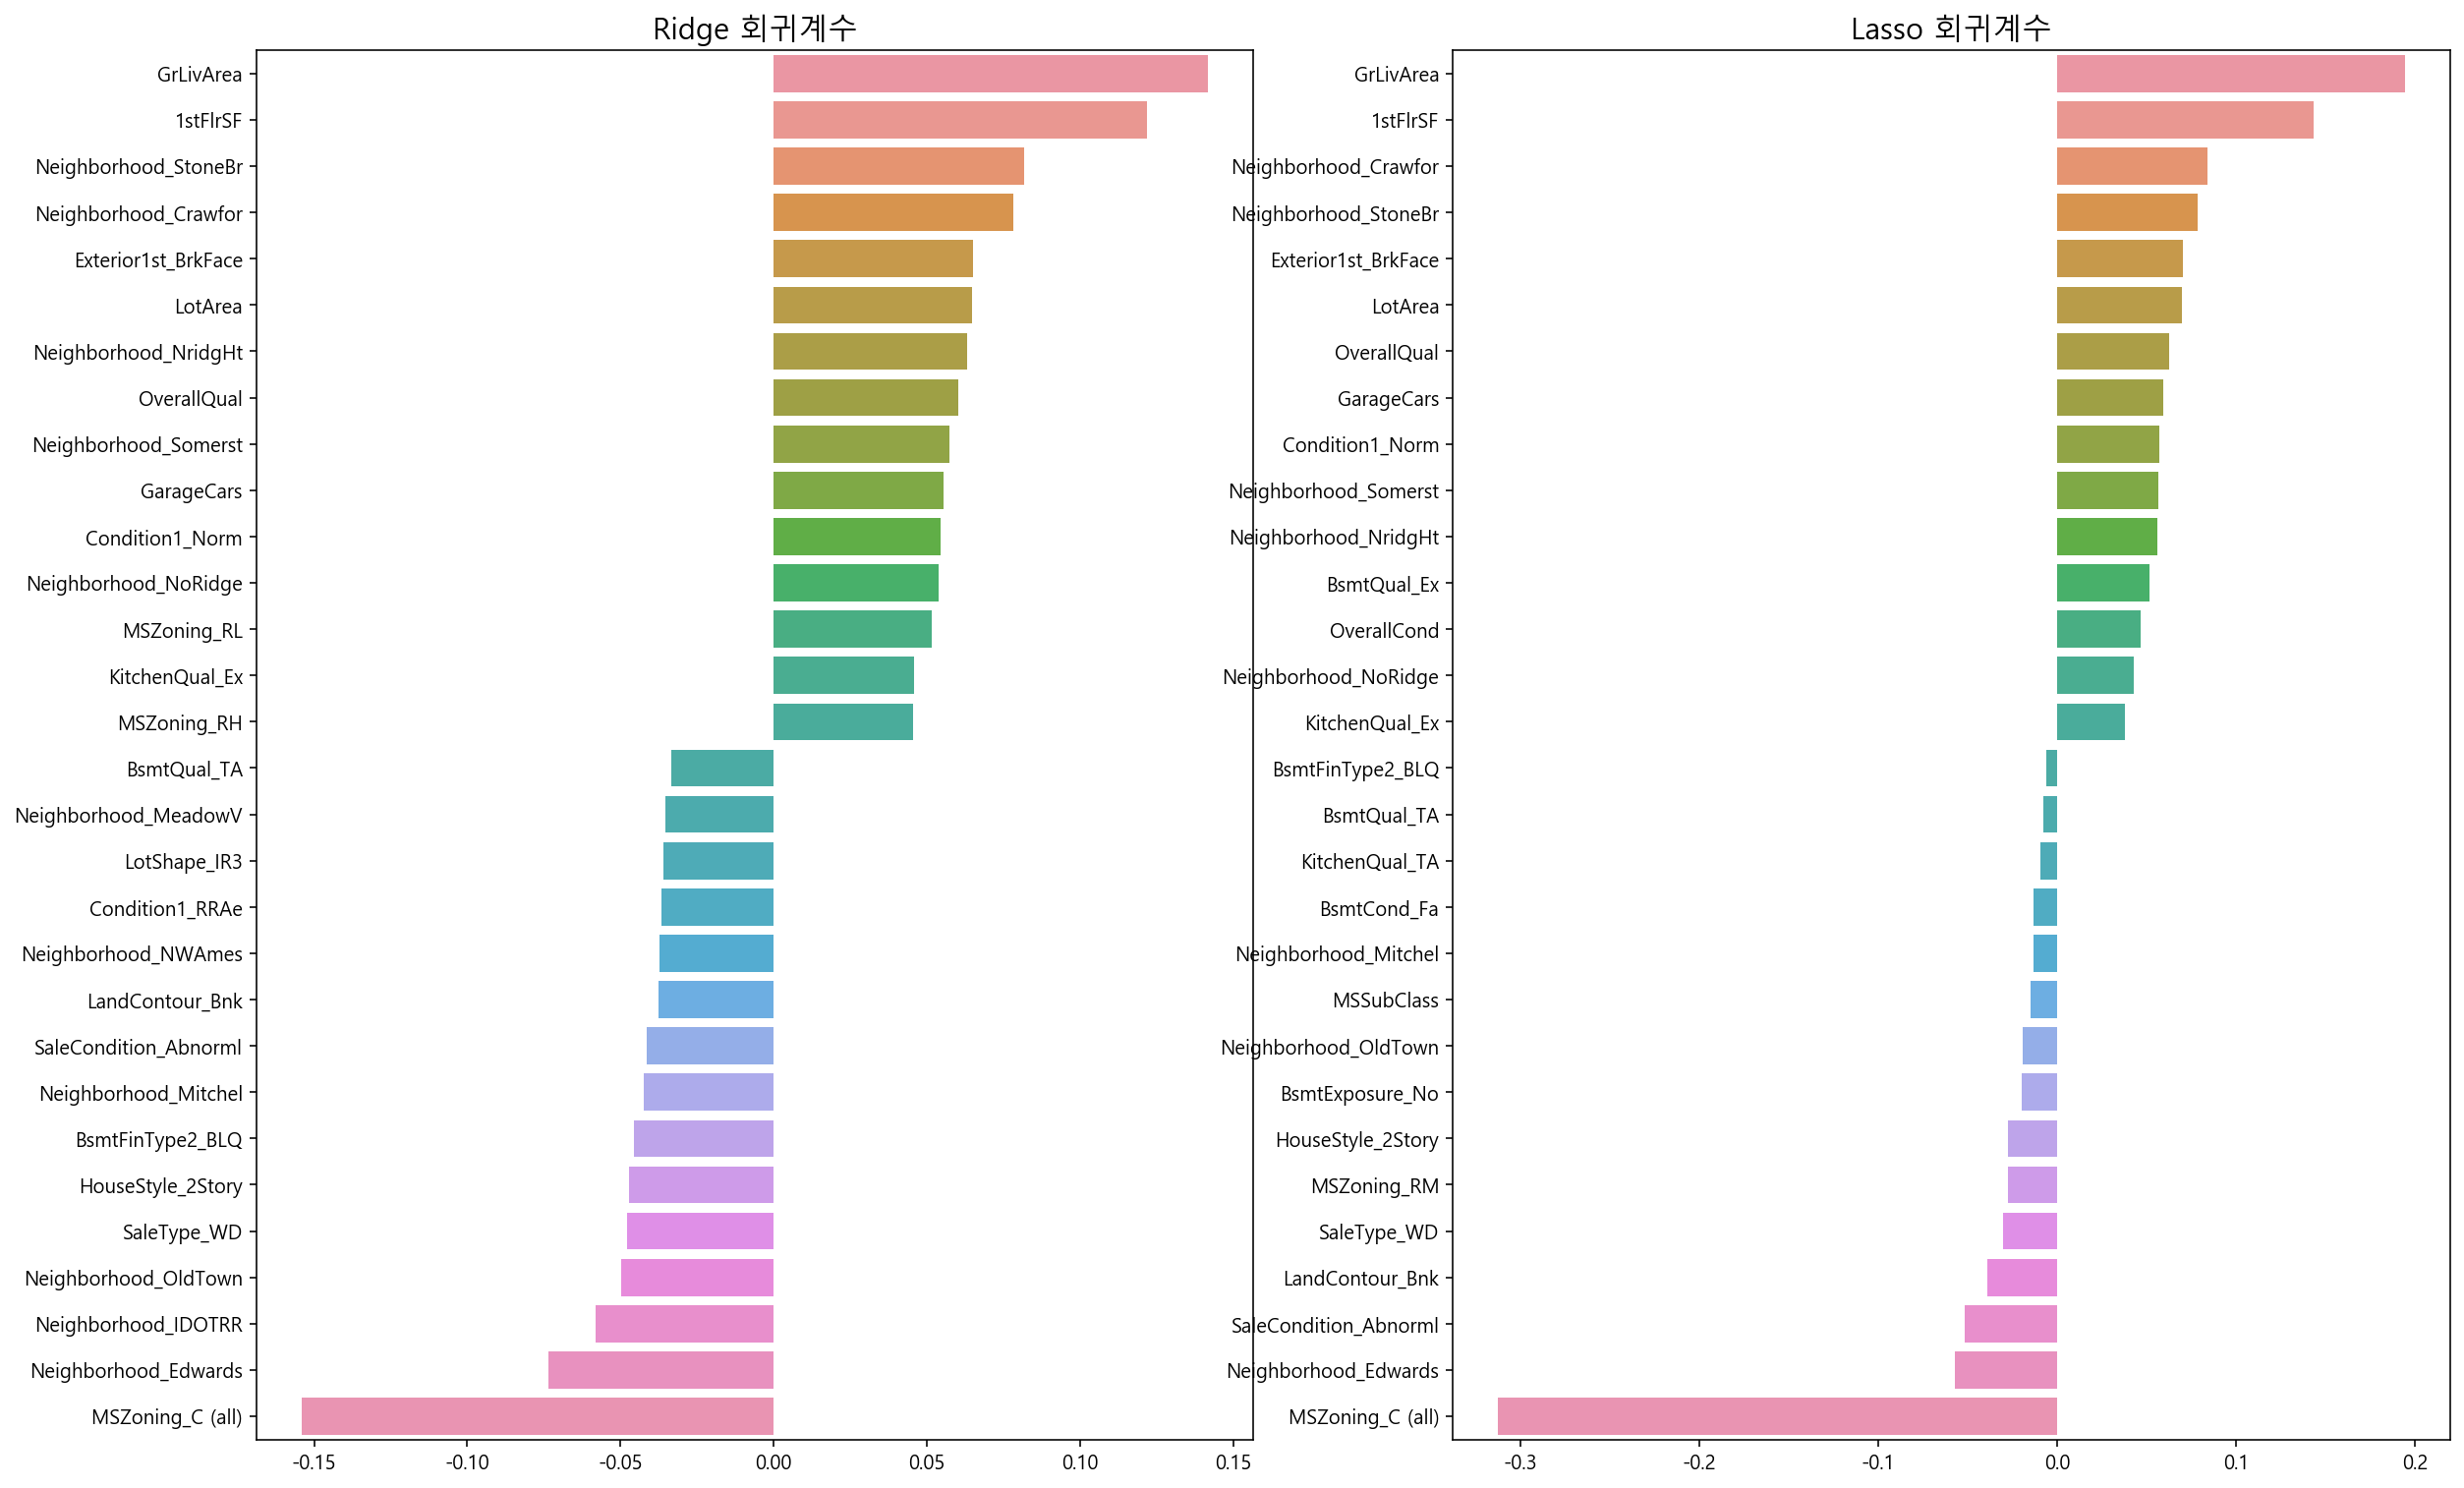

In [452]:
# 회귀계수 시각화
models = [ridge, lasso]
coefficient_visualize(models)

GrLivArea, 1stFlrSF, Neighborhood_StoneBr, Neighborhood_Crawfor 등이 부동산 가격에 미치는 영향이 높다 

### 이상치 처리

1차 과제 EDA에서 boxplot을 그린 결과, 상당수의 컬럼에서 이상치가 발견되었다.  
모든 이상치를 일괄적으로 삭제하는 것보다는 부동산 가격에 미치는 영향이 큰 몇 개의 컬럼들이 이상치를 처리하는 게 더 나을 것 같다

Ridge와 Lasso 모델의 회귀계수가 공통적으로 가장 큰 GrLivArea와 1stFlrSF의 산점도를 살펴본다.

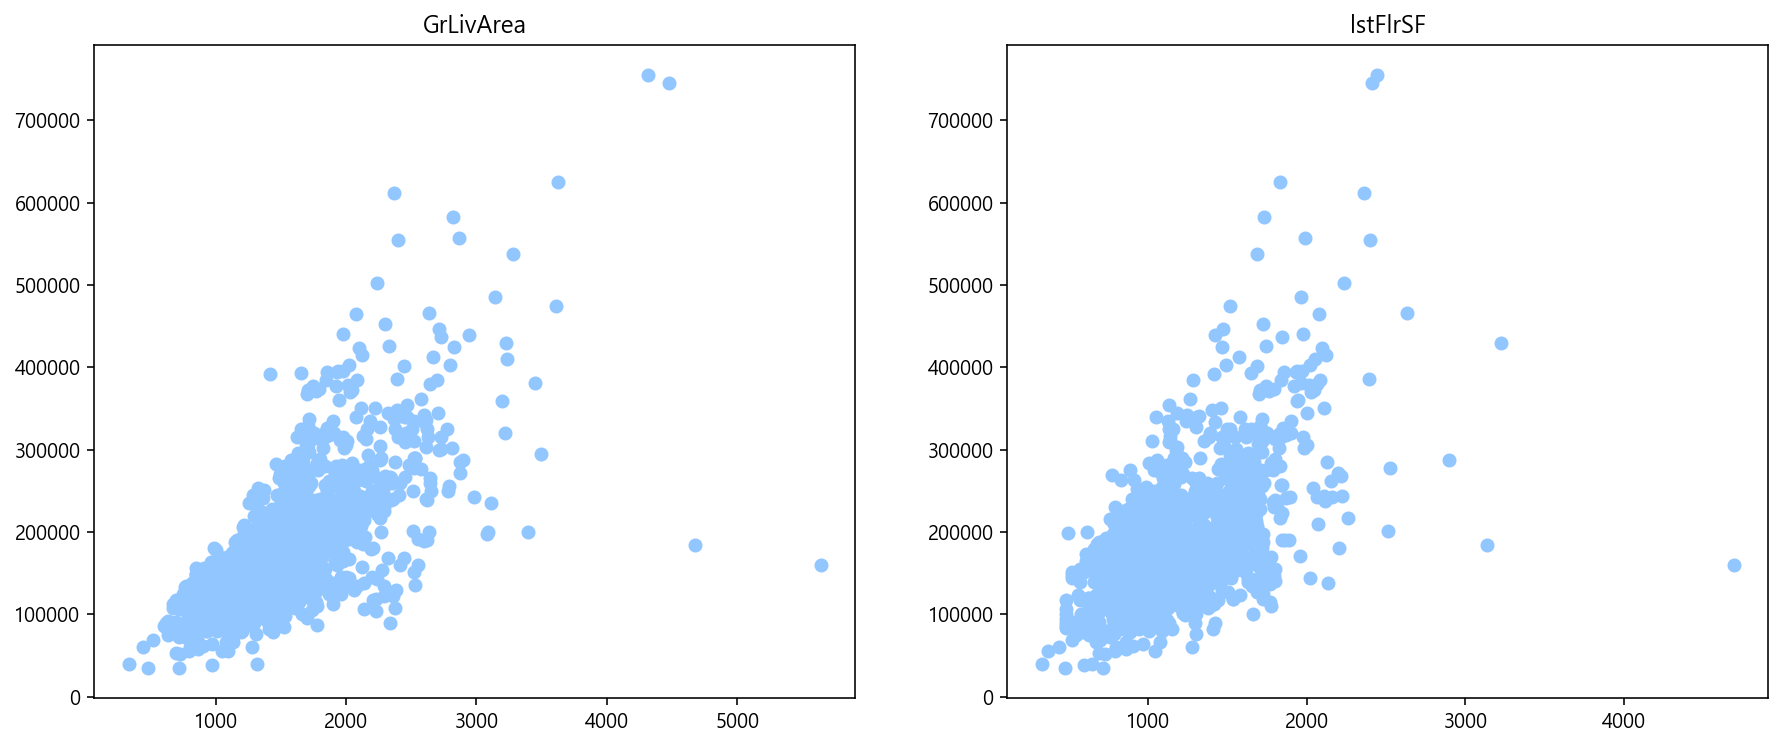

In [406]:
f, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].set_title('GrLivArea')
ax[0].scatter(x=df['GrLivArea'], y=df['SalePrice'])
ax[1].set_title('lstFlrSF')
ax[1].scatter(x=df['1stFlrSF'], y=df['SalePrice'])

**(1) GrLivArea가 4000이상인데 부동산 가격이 300000이하인 데이터 삭제**  
**(2) 1stFlrSF가 2500이상인데 부동산 가격이 300000이하인 데이터 삭제**

In [412]:
# 이상치
Gr_outlier1 = df_1_ohe['GrLivArea'] >= np.log1p(4000)
Gr_outlier2 = df_1_ohe['SalePrice'] <= np.log1p(300000)
firstfloor_outlier1 = df_1_ohe['1stFlrSF'] >= np.log1p(4000)
firstfloor_outlier2 = df_1_ohe['SalePrice'] <= np.log1p(300000)

Gr_outlier_index = df_1_ohe[Gr_outlier1 & Gr_outlier2].index
firstfloor_outlier_index = df_1_ohe[firstfloor_outlier1 & firstfloor_outlier2].index

# # 이상치 삭제
df_1_ohe.drop(index=Gr_outlier_index, axis=0, inplace=True)
df_1_ohe.drop(index=firstfloor_outlier_index, axis=0, inplace=True)

### ridge, lasso의 최적 알파값과 rmse값 찾고, 모델 학습

In [413]:
X = df_1_ohe.drop(columns='SalePrice', axis=1)
y = df_1_ohe['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)
ridge = Ridge()
ridge.fit(X_train, y_train)
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [414]:
# 최적의 알파값
ridge_grid_model = GridSearchCV(ridge, param_grid={'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]},
                               scoring='neg_mean_squared_error', cv=5)
ridge_grid_model.fit(X, y)
ridge_grid_rmse = np.sqrt(-1 * ridge_grid_model.best_score_)

lasso_grid_model = GridSearchCV(lasso, param_grid={'alpha':[0.001, 0.005, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]},
                                scoring='neg_mean_squared_error', cv=5)
lasso_grid_model.fit(X, y)
lasso_grid_rmse = np.sqrt(-1 * lasso_grid_model.best_score_)

print('{} 최적의 alpha값 : {}, 최적의 평균 rmse값: {}'.format(ridge.__class__.__name__, ridge_grid_model.best_params_, np.round(ridge_grid_rmse, 5)))
print('{} 최적의 alpha값 : {}, 최적의 평균 rmse값: {}'.format(lasso.__class__.__name__, lasso_grid_model.best_params_, np.round(lasso_grid_rmse, 5)))

Ridge 최적의 alpha값 : {'alpha': 8}, 최적의 평균 rmse값: 0.11464
Lasso 최적의 alpha값 : {'alpha': 0.001}, 최적의 평균 rmse값: 0.11435


In [416]:
# 조정된 알파값으로 학습
ridge = Ridge(alpha=8)
lasso = Lasso(alpha=0.001)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

rmse_functions([ridge, lasso])

[0.12726086975589895, 0.1258825015253581]

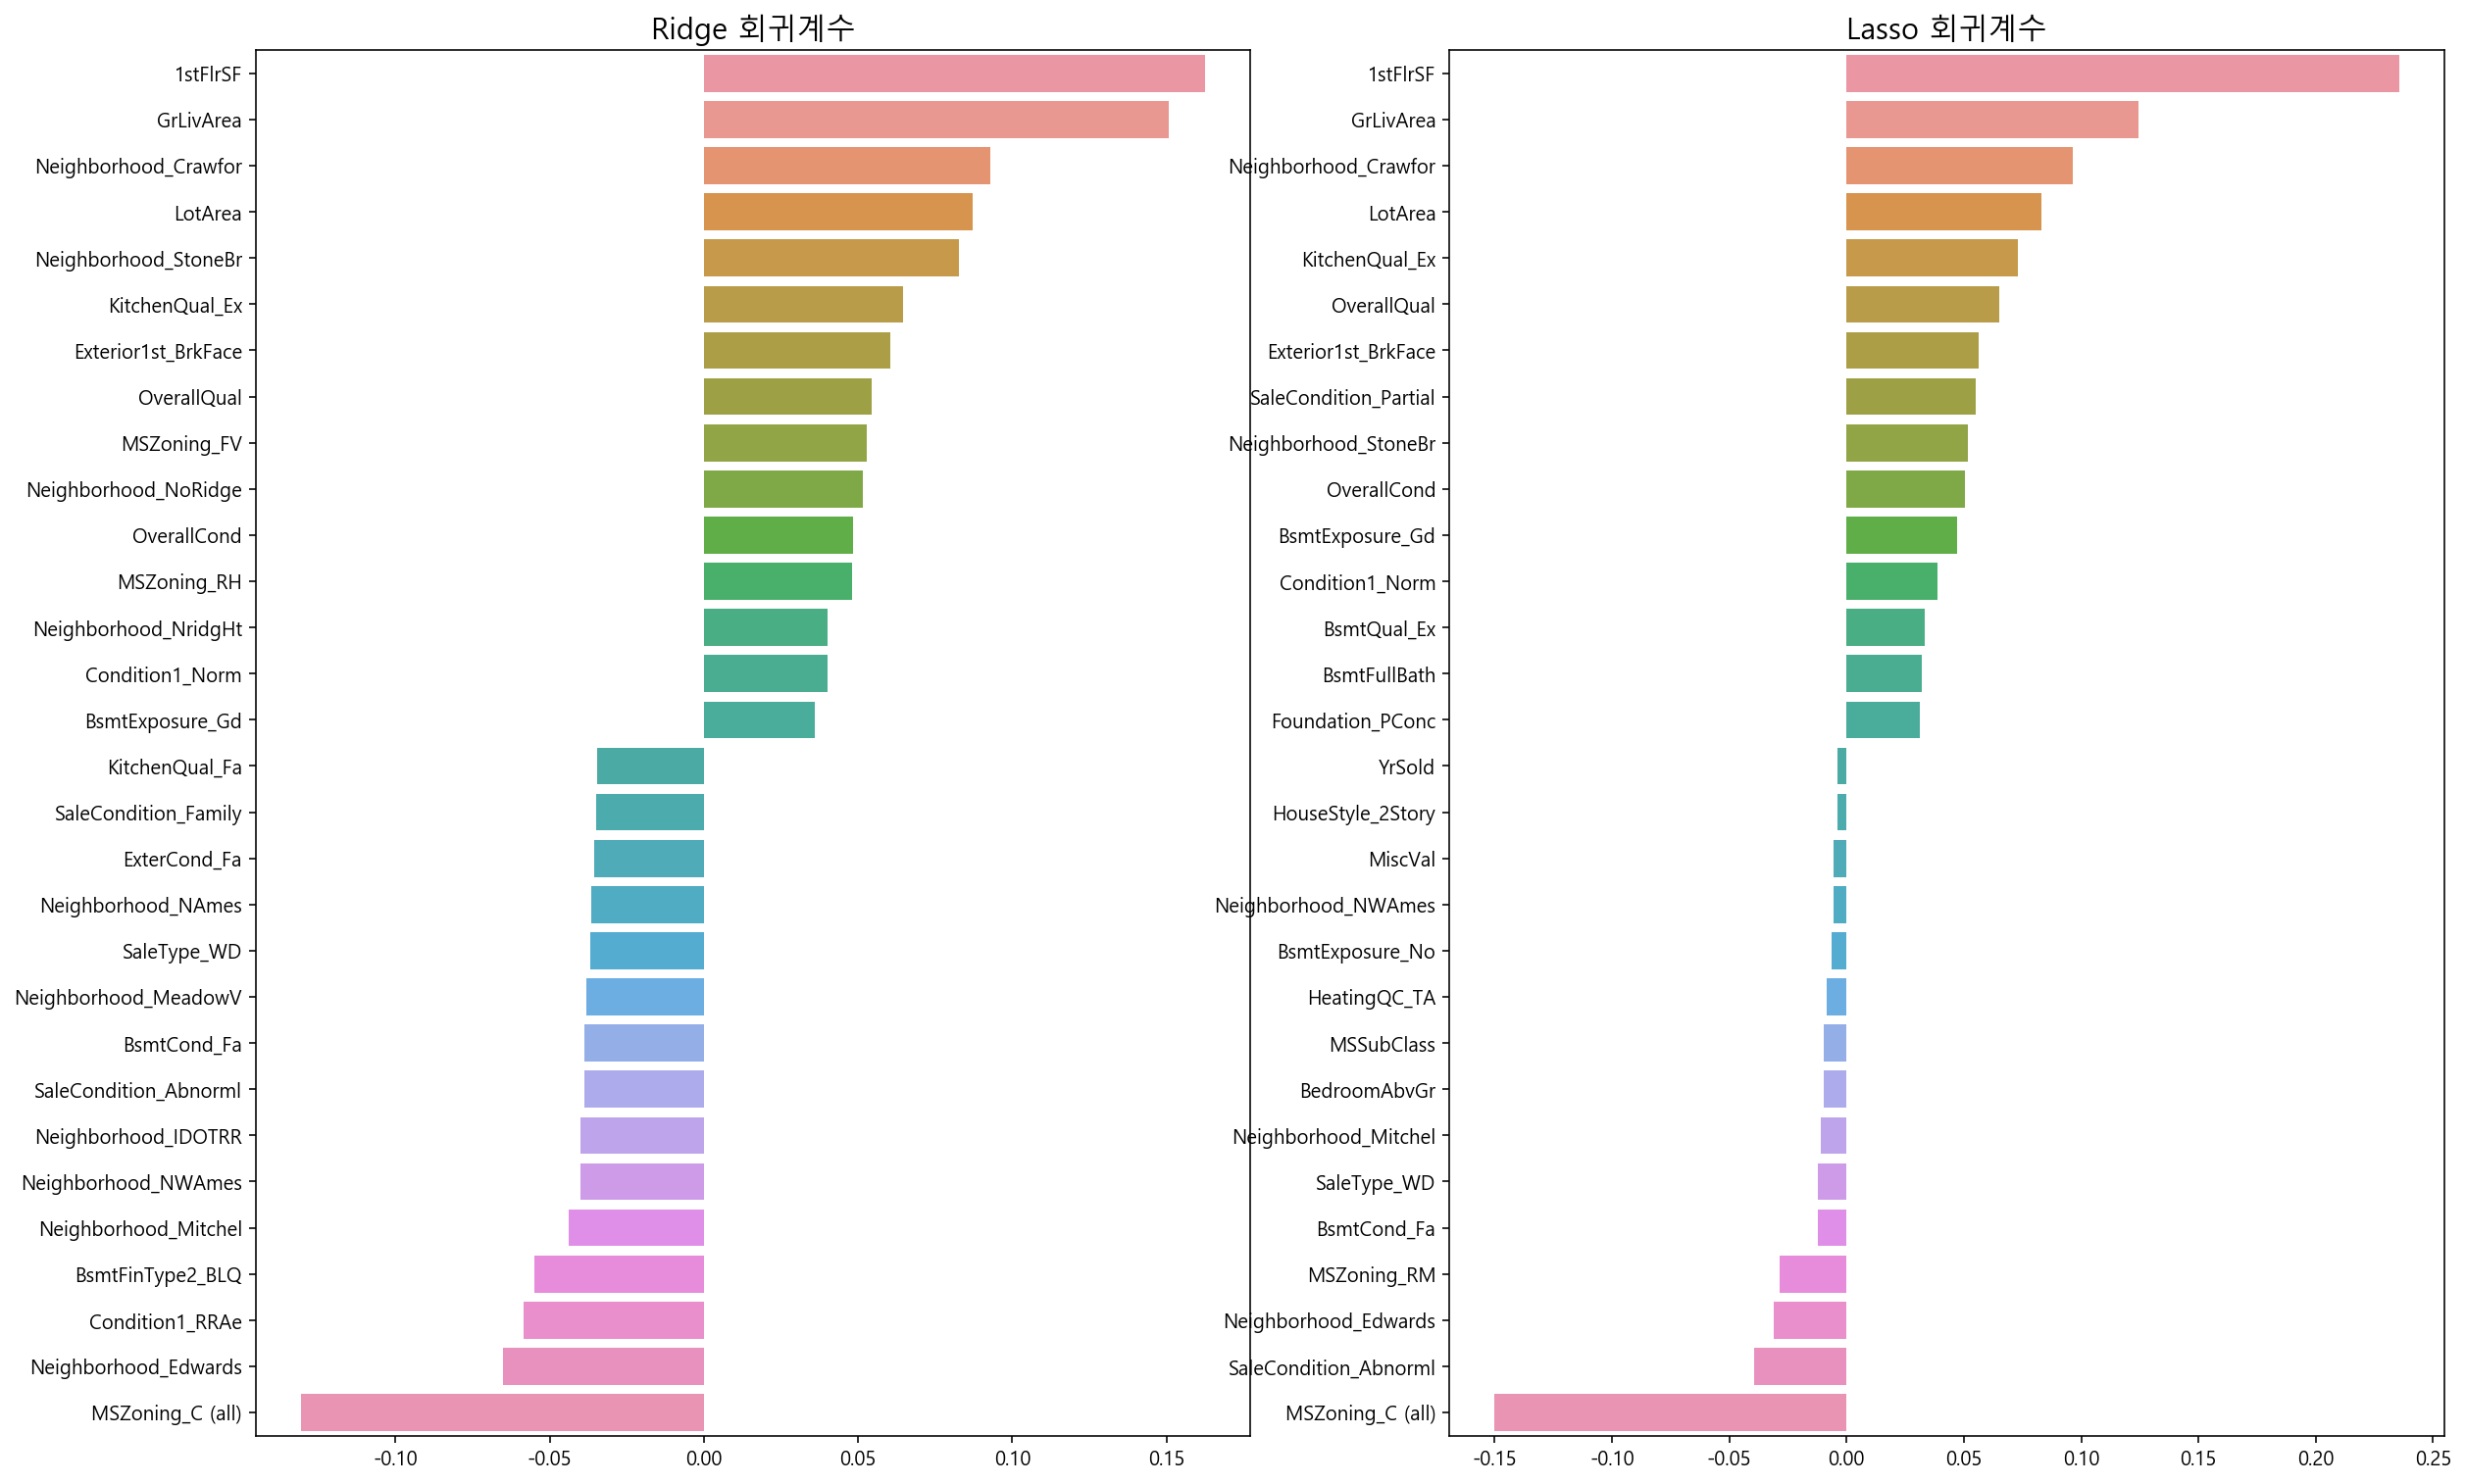

In [417]:
# 회귀계수 시각화
models = [ridge, lasso]
coefficient_visualize(models)

**이상치를 제거하기 전보다 성능이 떨어짐**  
아래에서 이상치 제거 전과 후의 모델을 비교해봄

## Ridge & Lasso 혼합 모델

### 이상치 제거 전(ridge alpha=12, lasso alpha=0.001)

Lasso모델의 성능이 Ridge보다 좀 더 잘 나왔으므로, Ridge 모댈 예측값의 (20~40)%, Lasso 모델 예측값의 (60~80)%를 더해봄

In [453]:
def rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        rmse = np.sqrt(mean_squared_error(y_test, pred_value))
        print('{}의 rmse : {}'.format(key, rmse))
        
ridge_train = Ridge(alpha=12)
ridge_train.fit(X_train, y_train)
lasso_train = Lasso(alpha=0.001)
lasso_train.fit(X_train, y_train)

ridge_pred = ridge_train.predict(X_test)
lasso_pred = lasso_train.predict(X_test)

pred = ridge_pred*0.4 + lasso_pred*0.6
preds = {'최종 혼합' : pred,
        'Ridge' : ridge_pred,
        'Lasso' : lasso_pred}

rmse_pred(preds)

최종 혼합의 rmse : 0.10822497367561369
Ridge의 rmse : 0.11079971460101788
Lasso의 rmse : 0.10800848393224706


In [454]:
pred = ridge_pred*0.2 + lasso_pred*0.8
preds = {'최종 혼합' : pred,
        'Ridge' : ridge_pred,
        'Lasso' : lasso_pred}

rmse_pred(preds)

최종 혼합의 rmse : 0.10796445962237164
Ridge의 rmse : 0.11079971460101788
Lasso의 rmse : 0.10800848393224706


In [455]:
pred = ridge_pred*0.3 + lasso_pred*0.7
preds = {'최종 혼합' : pred,
        'Ridge' : ridge_pred,
        'Lasso' : lasso_pred}

rmse_pred(preds)

최종 혼합의 rmse : 0.10805672667008262
Ridge의 rmse : 0.11079971460101788
Lasso의 rmse : 0.10800848393224706


**최종적으로, Ridge 모델 예측값의 20%와 Lasso 모델 예측값의 80%를 혼합한 모델을 사용하면 될 것 같음**

### 이상치 제거 후(ridge alpha=8, lasso alpha=0.001)

In [422]:
ridge_train = Ridge(alpha=8)
ridge_train.fit(X_train, y_train)
lasso_train = Lasso(alpha=0.001)
lasso_train.fit(X_train, y_train)

ridge_pred = ridge_train.predict(X_test)
lasso_pred = lasso_train.predict(X_test)

pred = ridge_pred*0.4 + lasso_pred*0.6
preds = {'최종 혼합' : pred,
        'Ridge' : ridge_pred,
        'Lasso' : lasso_pred}

rmse_pred(preds)

최종 혼합의 rmse : 0.12550337421769
Ridge의 rmse : 0.12726086975589895
Lasso의 rmse : 0.1258825015253581


In [423]:
pred = ridge_pred*0.2 + lasso_pred*0.8
preds = {'최종 혼합' : pred,
        'Ridge' : ridge_pred,
        'Lasso' : lasso_pred}

rmse_pred(preds)

최종 혼합의 rmse : 0.12553726287996944
Ridge의 rmse : 0.12726086975589895
Lasso의 rmse : 0.1258825015253581


In [424]:
pred = ridge_pred*0.3 + lasso_pred*0.7
preds = {'최종 혼합' : pred,
        'Ridge' : ridge_pred,
        'Lasso' : lasso_pred}

rmse_pred(preds)

최종 혼합의 rmse : 0.12548132971589931
Ridge의 rmse : 0.12726086975589895
Lasso의 rmse : 0.1258825015253581


**최종적으로, 이상치를 제거하기 전(ridge alpha=12, lasso alpha=0.001)의 Ridge 모델 예측값의 20%와 Lasso 모델 예측값의 80%을 혼합한 모델이 성능이 제일 좋아보인다.**